### Imports

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

### Raw Data

In [3]:
raw_data = pd.read_csv("raw_data/100720.csv")
raw_data

,id,target_chr,target_start,target_end,target_strand,target_sequence,target_context,target_geneid,grna_target_chr,grna_target_start,grna_target_end,grna_target_strand,grna_target_sequence,genome,cell_line,cleavage_freq,epigen_ctcf,epigen_dnase,epigen_rrbs,epigen_h3k4me3,epigen_drip,energy_1,energy_2,energy_3,energy_4,energy_5,study_name,whole_genome,delivery_mode
0,0,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,ATTCTAAACTGTACCCTGTTACTTATCCCCTTCCTATGACATGAAC...,HBB,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,7.875890e-01,0.0,0.0,0.0,0.0,0.0,22.650,20.146794,20.146794,31.050,31.050,Kim,0,2
1,1,chr1,38230662.0,38230684.0,-,CTCTGTCTCGCGCTGCTTTTGGG,AGAGGCTGCAAGTGTTGCTGCCTCCCCGAGGGTCGCCCCTCCTTAA...,EPHA10,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,3.840000e-04,0.0,0.0,0.0,0.0,0.0,-17.665,-51.262216,-51.262216,-9.265,-9.265,Kim,0,2
2,2,chr1,177593963.0,177593985.0,+,TCTACCCCACATGGCAGTAATGG,ATTTTTTATAGCTGGGGAGGTATTAGAGGAAAGACAGAACTGTACT...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,3.050000e-04,0.0,0.0,0.0,0.0,0.0,13.760,6.245204,6.245204,22.160,22.160,Kim,0,2
3,3,chr1,191839001.0,191839023.0,+,CCATAGCACTCTTTAAAAAAAGC,ACAAACATAACACATATATATCTACACAGACAGACAAAAGATTCAG...,RP11-541F9.1,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,0.000000e+00,0.0,0.0,0.0,0.0,0.0,-19.275,0.000000,-46.939290,0.000,-10.875,Kim,0,2
4,4,chr2,91869704.0,91869726.0,+,CTTACCTCACAGGGCAGTGAGAG,CCTTGGACAAACAACCTTGTCCTCAAGGTCCTCTGTGCCCCCATGT...,NaN,chr11,5248198.0,5248220.0,+,CTTGCCCCACAGGGCAGTAACGG,hg19,HAP1,4.800000e-05,0.0,0.0,0.0,0.0,0.0,11.610,2.751414,3.057127,18.009,20.010,Kim,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,25627,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGT,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,9.614866e-20,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25628,25628,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTA,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,5.104533e-17,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25629,25629,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTC,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,1.125790e-19,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2
25630,25630,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTTG,NaN,NaN,NaN,NaN,NaN,+,GTGATAAGTGGAATGCCATGTGG,NaN,NaN,7.712115e-06,0.0,0.0,0.0,0.0,0.0,24.400,0.000000,18.270788,0.000,26.900,Finkelstein,0,2


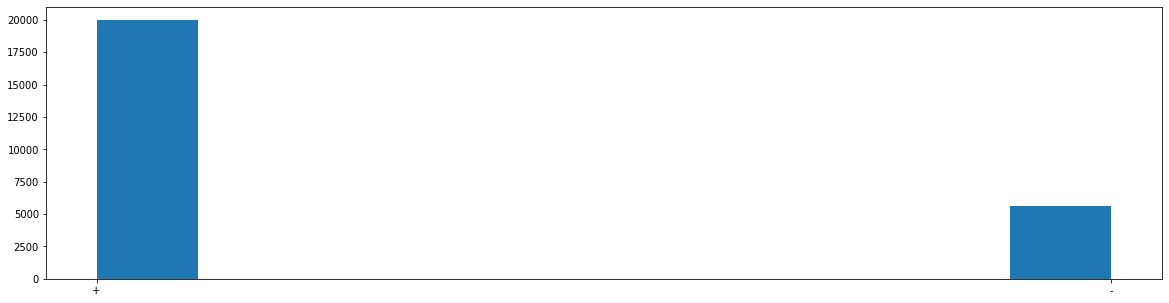

In [4]:
target_strands = raw_data.target_strand
fig = plt.figure(figsize = (20, 5))
plt.hist(target_strands)
plt.show()

In [ ]:
delivery = raw_data.delivery_mode
fig = plt.figure(figsize = (20, 5))
plt.hist(delivery)
plt.show()

In [ ]:
studies = raw_data.study_name
fig = plt.figure(figsize = (20, 5))
plt.hist(studies)
plt.show()

In [ ]:
cells = raw_data.cell_line.fillna('none')
fig = plt.figure(figsize = (20, 5))
plt.hist(cells)
plt.show()

In [ ]:
target_chromosome = raw_data.target_chr.fillna("chr0")
target_chromosome = target_chromosome.dropna()
fig = plt.figure(figsize = (20, 5))
plt.hist(target_chromosome)
plt.show()

In [ ]:
gRNASeq = raw_data[["grna_target_sequence", "study_name"]].drop_duplicates()
gRNASeq

In [ ]:
raw_data["cleavage_freq"].dropna()

In [ ]:
data = data[data['grna_target_sequence'].str.len() != data['target_sequence'].str.len()].dropna()
data